Bonjour à tous,

Ceci est un fichier de note spécial COVID-19 qui contient du code d'analyse pour vous illustrer l'importance des choix expérimentaux que nous avons vu durant le cours en nous appuyant sur l'experience de Posner et Mitchell (1967). La partie code n'est utile que pour ceux que ça intéresse, pour les autres vous pouvez parfaitement vous contenter de lire les sorties des cellules de codes en complément de mes commentaires.

In [1]:
## Import des librairies python (3.7) nécessaires
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Lecture et rassemblement de vos données

Ici je crée la variable qui va contenir les données de tous les participants que vous avez récoltés, la sortie de la cellule 2 vous montre un extrait de ce sur quoi je vais travailler le long de ce fichier de note. Je passe par python mais la logique tient pour excel ou n'importe quel autre moyen d'analyse.

In [2]:
list_ = []#variable vide pour stocker les données
for f in os.listdir('data/'):#Pour chaque fichier dans le répértoire data
    raw_ = pd.read_csv('data/'+f)#lire le fichier
    raw_['ordre'] = f.split('_')[0]#extraire l'ordre 
    raw_['participant'] = f.split('_')[1]#le nom du participant
    #Supprimer les variables inutiles pour plus de clareté :
    del raw_['expName']
    del raw_['date']
    del raw_['Unnamed: 10']
    del raw_['tache.1']
    list_.append(raw_)
df = pd.concat(list_, ignore_index=True)#rassembler le tout
df = df[np.isfinite(df.trial)]#fix petit bug chez certain
df.participant = df.participant.replace(df.participant.unique(), np.arange(10)+1)#Anonymisation des participants en leur attribuant des numéros
df.rt = df.rt*1000 #conversion de seconde à milliseconde pour faciliter la lecture, rt = temps de réaction
print(df.head())#afficher un extrait des données rassemblées
df.to_csv('df.csv')#export des données

    expected   response  precision         rt  trial  tache  participant ordre
0       same       same        1.0  1200.4618    1.0    1.0            1   123
1  different  different        1.0   841.4807    2.0    1.0            1   123
2       same       same        1.0  1070.5012    3.0    1.0            1   123
3       same       same        1.0   794.7262    4.0    1.0            1   123
4  different  different        1.0   607.6545    5.0    1.0            1   123


Précision sur les colonnes : Expected = réponse attendue, Response = réponse donnée, précision = rep correcte(0)/incorrecte(1), rt = temps de réaction, trial = numéro de l'essai

# Analyse des choix expérimentaux

Nous avons ''choisi'' (ou en tout cas le confinement nous a forcé) de récolter 10 participants

In [3]:
print(df.participant.unique())#ici on exporte le nombre d'identifiant de sujet unique
print(len(df.participant.unique()))#là je ne fais que compter le nombre de sujet

[ 1  2  3  4  5  6  7  8  9 10]
10


Chacun de ces sujets a passé les trois tâches + la tâche d'entrainement

In [4]:
print(df.tache.unique())
print(len(df.tache.unique()))

[1. 2. 3. 0.]
4


Chaque sujet a passé 96 essais pour chaque tâche (et 16 pour l'entraînement), exemple pour le participant n°1

In [5]:
print(df.groupby(['participant','tache']).trial.count().head(4))#Ici je groupe par taches et par participants et je compte le nombre d'essais au sein de ces cellules finalement j'affiche uniquement le premier sujet

participant  tache
1            0.0      16
             1.0      96
             2.0      96
             3.0      96
Name: trial, dtype: int64


# Plan Expérimental

Notre plan expérimental est le suivant : 

$\underline{S}_{10} \times Tache_3$

Comme vu en cours, dans le cas d'un plan emboîté, on a pas besoin de procéder à une attribution aléatoire de nos participants à une des modalités de notre VI puisque chaque participant passe par toutes les modalités de la VI.
En revanche un facteur important que l'on introduit par un facteur emboîté c'est le facteur d'ordre pour cela on cherche à contrbalancer l'ordre de passation.

Initialement dans le cadre du cours, chaque expérimentateur s'était vu attribué un ordre particulier parmi les ordres possibles : 123,231,312,213,321,132


Malheureusement, confinement se faisant, seuls quatre d'entre vous ont pu m'envoyer leurs données, au final tous les ordres ne sont pas représentés et certains le sont plus que d'autres : 

In [6]:
print(df.groupby(['ordre']).trial.count())#Ici je compte le nombre d'essai pour chaque ordre

ordre
123    1520
213     608
321     912
Name: trial, dtype: int64


Notez que par simplicité je vous ai attribué un ordre à chacun, confondant ainsi le facteur ordre et le facteur expérimentateur, idéalement il aurait fallu que chacun fasse passer tous les ordres.

# Choix a priori de la variable dépendante

Comme vu en cours une tâche de choix génère automatiquement deux VD, la justesse de la réponse (correcte ou incorrecte) et le temps nécessaire au choix (temps de réaction).

Dans cette tâche on a choisi une tâche relativement simple dans laquelle nous n'attendons pas beaucoup d'erreurs, on peut le vérifier de la façon suivante :

In [7]:
df.precision.mean()#on calcule la moyenne des 0 (incorrecte) et 1 (correcte) dans la colonne précision

0.9486842105263158

Le taux de réponse correcte est effectivement très élevé (environ 95\%), ainsi observer une modification de cette VD risque d'être difficile puisqe beaucoup de participant vont être très proches d'une performance plafond.

Ainsi on choisi de travailler sur le temps de réaction (TR), et d'observer l'effet de notre VI sur ce TR.

Si on regarde la distribution des temps de réaction, indifféremment du participant ou de la tâche (donc 96 essais * 3 tâche * 10 participants = 2880 observations) on observe l'histogramme suivant :

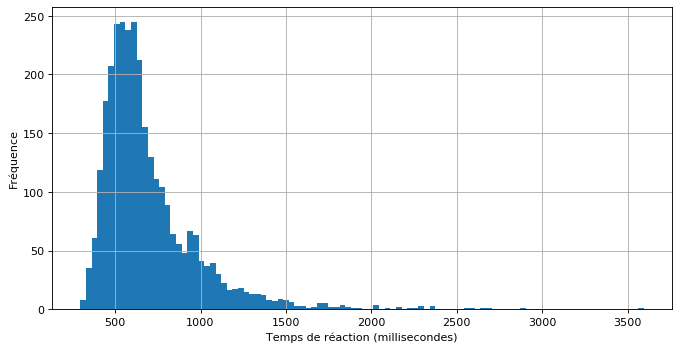

In [8]:
fig=plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
df.rt.hist(bins=100)
plt.ylabel('Fréquence')
plt.xlabel('Temps de réaction (millisecondes)')
plt.show()

Ici chaque barre/créneau représente une discrétisation de la VD, ex. la barre au dessus des 500ms comprends les TR entre (par exemple) 475 et 525 ms.
La valeur en y représente la fréquence dans l'échantillon ainsi un TR entre 475 et 525ms est présent environ 225 fois dans notre échantillon, elle est donc beaucoup plus fréquente que les TR autour des 2000 ms par exemple.

# Hypothèse

L'hypothèse simplifiée que nous allons tester provient de l'article de Ponser et Michell (1967), qui eux même se basent sur la méthode soustractive de Donders (1868).

Notre prédiction c'est que le TR représente le parcours de l'information à travers différents modules de traitement, ainsi nous attendons à ce qu'une tâche qui à une étape de plus qu'une autre soit plus lente que celle-ci.

- La tache 1 représentait une discrimination de l'identité physique (e.g. A et a sont différents, A et A sont les mêmes)
- La tâche 2 représentation une discrimination sur l'identité symboliques des lettres (e.g. A et B sont différents, A et a sont les mêmes)
- La tâche 3 représentation une discrimination de catégorie, syllabe ou voyelle (e.g. A et B sont différents, A et E sont les mêmes)

L'idée est que la tâche 3 comprends toutes les étapes de la tâche 2 + une étape d'identification de la catégorie. De la même faç_on la tâche 2 comprends toutes les étapes de la tâche 1 + une étape d'identification de la lettre.

Ainsi sur notre VD on prédit : 

TR Tache 3 > TR Tache 2 > TR tache 1

La tache 0, l'entrainement (chiffres) ne compte pas dns notre analyse, on l'utilise uniquement pour familiariser le sujet avec la tâche.

_Pour aller plus loin : On peut tester l'efficacité de notre tâche d'entraînement, on s'attend en effet à ce que nos sujets, a mesure qu'ils se familiarisent avec la tâche, aillent de plus en plus vite :_

Text(0.5, 0, "numéro de l'essai")

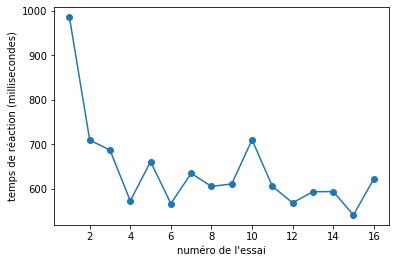

In [9]:
#ici je sélectionne les TR pour la tâche d'entrainement et pour chaque essai (1,2,...,16) je fais la moyenne de mes participants
essais = df[df.tache==0].groupby('trial').rt.mean()
#ensuite je trace en x les essais et en y les valeurs de ces moyennes de TR
plt.plot(essais.index, essais.values,'o-')
plt.ylabel('temps de réaction (millisecondes)')
plt.xlabel('numéro de l\'essai')

_j'observe effectivement que le premier TR est très lent comparé aux derniers, mes participants montrent bien un effet d'habituation à la tâche_

# Test de l'hypothèse

Mon hypothèse porte sur une différence de moyenne de TR en fonction de la tâche avec l'ordre 3 > 2 > 1. Je vais donc calculer et représenter ces moyennes

In [10]:
moyennes = df[df.tache != 0].groupby('tache').rt.mean()
print(moyennes)

tache
1.0    565.226635
2.0    632.641484
3.0    900.309932
Name: rt, dtype: float64


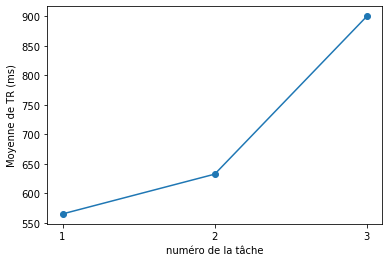

In [11]:
plt.plot(moyennes.index, moyennes.values,'o-')
plt.ylabel('Moyenne de TR (ms)')
plt.xlabel('numéro de la tâche')
plt.xticks([1,2,3])
plt.show()

J'observe bien une augmentation du TR avec le numéro de la tâche dans l'ordre que j'ai théoriquement justifié au préalable.

évidemment l'observation d'un effet sur les moyennes n'est pas suffisante, il s'agit de prendre en compte la variabilité de nos données et si celle-ci pourrait aléatoirement avoir générée la différence dans nos moyennes, on pourrait déjà observer ça pour nos données en regardant simplement l'écart-type enter ces tâches

In [12]:
moyennes = df[df.tache != 0].groupby('tache').rt.mean()
#Je calcule d'abord les moyenne de TR pour chaque participant dans les trois tâches puis je calcule la dispersion, par l'ecart-type, de ces moyennes
sd = df[df.tache != 0].groupby(['participant','tache']).rt.mean().reset_index().groupby('tache').rt.std()
print(sd)

tache
1.0    104.172081
2.0     91.054207
3.0    146.601501
Name: rt, dtype: float64


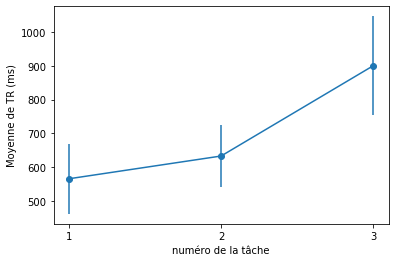

In [13]:
plt.errorbar(moyennes.index, moyennes.values, yerr=sd, marker='o')
plt.ylabel('Moyenne de TR (ms)')
plt.xlabel('numéro de la tâche')
plt.xticks([1,2,3])
plt.show()

Je vois clairement que la variabilité au sein des tâches rend difficilement compte de la différence observée pour mes moyennes, je peux par la suite tester formellement en appliquant un modèle statistiques (e.g. modèle linéaire)

# Exploration de l'impact des choix expérimentaux

## Différence entre un plan intra et un plan inter

Pour illustrer la différence entre un plan inter et un plan intra je vais calculer les moyennes de TR par participant dans chaque tache

In [14]:
moyennes = df[df.tache != 0].groupby(['tache','participant']).rt.mean().reset_index()
#Je calcule d'abord les moyenne de TR pour chaque participant dans les trois tâches puis je calcule la dispersion, par l'ecart-type, de ces moyennes
sd = df[df.tache != 0].groupby(['participant','tache']).rt.std().reset_index()
print(sd)

    participant  tache          rt
0             1    1.0  164.639832
1             1    2.0  162.821310
2             1    3.0  443.536970
3             2    1.0  233.900578
4             2    2.0  181.688743
5             2    3.0  344.272115
6             3    1.0  118.710703
7             3    2.0  211.372147
8             3    3.0  339.048773
9             4    1.0   79.540870
10            4    2.0  149.452881
11            4    3.0  493.078256
12            5    1.0  136.388786
13            5    2.0  190.107381
14            5    3.0  235.632247
15            6    1.0   77.257304
16            6    2.0  110.446037
17            6    3.0  307.205777
18            7    1.0   94.835576
19            7    2.0  106.568214
20            7    3.0  321.920909
21            8    1.0  146.826637
22            8    2.0  118.148435
23            8    3.0  153.523288
24            9    1.0   79.648942
25            9    2.0   96.581209
26            9    3.0  237.883978
27           10    1

Dans un plan inter-sujet, chaque sujet passe par une modalité seulement ainsi je n'ai (ici virtuellement) qu'un point d'observation (moyenne) par sujet

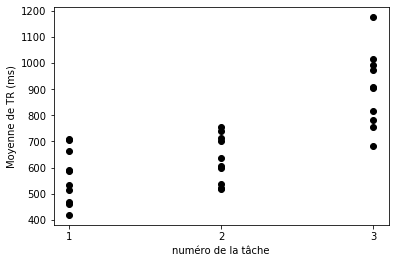

In [15]:
for sujet, donnee_sujet in moyennes.groupby('participant'):
    plt.plot(donnee_sujet.tache, donnee_sujet.rt,'o',label=sujet, color='k')
plt.ylabel('Moyenne de TR (ms)')
plt.xlabel('numéro de la tâche')
plt.xticks([1,2,3])
plt.show()

Il est ainsi difficile de dire, si j'ai peu de sujets dans chaque cellule/modalité, si c'est bien un effet de ma VI ou si, par biais d'échantillonage, les participants de la troisième modalité étaient tout simplement plus lents.

En revanche dans un plan intra-sujet je peux donc observer l'effet de ma VI sur chaque sujet individuellement puisque j'ai bien une moyenne par modalité

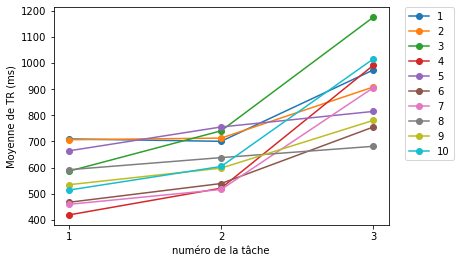

In [16]:
for sujet, donnee_sujet in moyennes.groupby('participant'):
    plt.plot(donnee_sujet.tache, donnee_sujet.rt,'o-',label=sujet)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Moyenne de TR (ms)')
plt.xlabel('numéro de la tâche')
plt.xticks([1,2,3])
plt.show()

Ici j'observe que quasiment tous les sujets se conforment à ma prédiction 3 > 2 > 1, renforçant ainsi l'évidence en faveur de mon hypothèse, cependant on peut toujours imaginer que par un biais d'échantillonnage je n'ai sélectionné que des sujets présentant un effet de ralentissement, et que la populaiton contient en réalité autant de personnes présentant une accélération. D'où l'importance, même dans un plan intra-sujet d'avoir un nombre suffisant de sujets pour généraliser les résultats au delà de l'échantillon.

# Impact du nombre d'observations

Quel impact si au lieu de 96 essais je n'en ai qu'une dizaine ?

In [17]:
#Ici je tire aléatoirement 10 essais pour chaque combinaison de participant X tache
tirage = df[df.tache != 0].groupby(['participant','tache']).apply(lambda x: x.sample(10, random_state=111)).reset_index(drop=True)

In [18]:
tirage.head()

,expected,response,precision,rt,trial,tache,participant,ordre
0,different,different,1.0,600.2779,88.0,1.0,1,123
1,different,different,1.0,611.1364,17.0,1.0,1,123
2,different,different,1.0,486.5745,65.0,1.0,1,123
3,same,same,1.0,874.4594,16.0,1.0,1,123
4,different,different,1.0,574.7732,63.0,1.0,1,123


In [19]:
moyennes = tirage[tirage.tache != 0].groupby('tache').rt.mean()
#Je calcule d'abord les moyenne de TR pour chaque participant dans les trois tâches puis je calcule la dispersion, par l'ecart-type, de ces moyennes
sd = tirage[df.tache != 0].groupby(['participant','tache']).rt.mean().reset_index().groupby('tache').rt.std()
print(sd)

tache
1.0     89.961395
2.0     88.471161
3.0    140.714817
Name: rt, dtype: float64


/home/gabriel/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


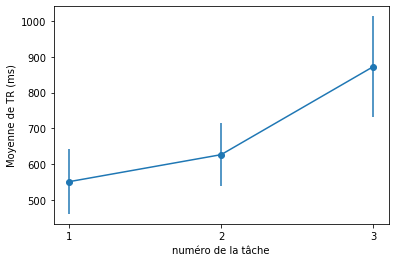

In [20]:
plt.errorbar(moyennes.index, moyennes.values, yerr=sd, marker='o')
plt.ylabel('Moyenne de TR (ms)')
plt.xlabel('numéro de la tâche')
plt.xticks([1,2,3])
plt.show()

On observe que les résultats vont dans le même sens même si la variabilité a augmentée, heureusement l'effet semble suffisamment robuste/fort pour apparaître même avec peu d'essais. Si en revanche je prends un cas plus extrême et je n'échantillonais qu'une observation par sujet :

In [21]:
#Ici je tire aléatoirement 1 essais pour chaque combinaison de participant X tache
tirage = df[df.tache != 0].groupby(['participant','tache']).apply(lambda x: x.sample(1, random_state=111)).reset_index(drop=True)

In [22]:
tirage.head()

,expected,response,precision,rt,trial,tache,participant,ordre
0,different,different,1.0,600.2779,88.0,1.0,1,123
1,different,different,1.0,578.0009,88.0,2.0,1,123
2,same,same,1.0,555.6645,88.0,3.0,1,123
3,different,different,1.0,752.0183,88.0,1.0,2,123
4,different,different,1.0,598.9233,88.0,2.0,2,123


In [23]:
moyennes = tirage[tirage.tache != 0].groupby('tache').rt.mean()
#Je calcule d'abord les moyenne de TR pour chaque participant dans les trois tâches puis je calcule la dispersion, par l'ecart-type, de ces moyennes
sd = tirage[df.tache != 0].groupby(['participant','tache']).rt.mean().reset_index().groupby('tache').rt.std()
print(sd)

tache
1.0    108.007337
2.0     59.524386
3.0    248.933038
Name: rt, dtype: float64


/home/gabriel/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


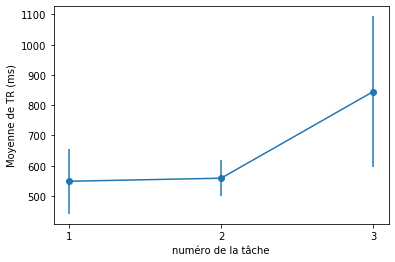

In [24]:
plt.errorbar(moyennes.index, moyennes.values, yerr=sd, marker='o')
plt.ylabel('Moyenne de TR (ms)')
plt.xlabel('numéro de la tâche')
plt.xticks([1,2,3])
plt.show()

Je n'observe par exemple plus de différence entre la tache 1 et la tâche 2, ce qui ne validerait pas (au moins en partie) mon hypothèse théorique.

## Impact de l'ordre

Pour illustrer l'impact de l'ordre je vais calculer séparément les moyennes pour les trois ordres dont je dispose (123,213,321). Cependant vu le faible nombre d'ordre finalement réalisé et le peu de sujet par ordre il va être difficile de tirer des conclusions sur cet effet d'ordre de passation des tâches

In [25]:
moyennes = df[df.tache != 0].groupby(['tache','ordre']).rt.mean().reset_index()
#Je calcule d'abord les moyenne de TR pour chaque participant dans les trois tâches puis je calcule la dispersion, par l'ecart-type, de ces moyennes
sd = df[df.tache != 0].groupby(['participant','tache','ordre']).rt.mean().reset_index().groupby(['tache','ordre']).rt.std().reset_index()
print(moyennes)

   tache ordre          rt
0    1.0   123  561.686587
1    1.0   213  599.313279
2    1.0   321  548.402285
3    2.0   123  611.018458
4    2.0   213  676.726741
5    2.0   321  639.289691
6    3.0   123  959.052215
7    3.0   213  797.841238
8    3.0   321  870.718590


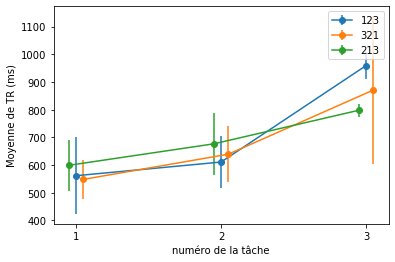

In [26]:
plt.errorbar(moyennes[moyennes.ordre == "123"].tache, moyennes[moyennes.ordre == "123"].rt,  yerr = sd[sd.ordre == "123"].rt, marker='o', label="123")
plt.errorbar(moyennes[moyennes.ordre == "321"].tache+.05, moyennes[moyennes.ordre == "321"].rt,  yerr = sd[sd.ordre == "321"].rt,  marker='o', label="321")
plt.errorbar(moyennes[moyennes.ordre == "213"].tache-.05, moyennes[moyennes.ordre == "213"].rt,  yerr = sd[sd.ordre == "213"].rt,  marker='o', label="213")
plt.legend()
plt.ylabel('Moyenne de TR (ms)')
plt.xlabel('numéro de la tâche')
plt.xticks([1,2,3])
plt.show()

Ici je vois que les sujets avec l'ordre 123 ont une différence entre la première et la dernière tâche plus important. Il se pourrait en effet qu'avec ma VI se confonde la fatigue des sujets à mesure que l'expérience avance, en revanche étant donné le faible nombre de participant récolté par ordre je n epeux évidemment pas tirer de conclusion sur la nature de la différence observée.

# Conclusion


En conclusion ce petit exemple nous a permis d"explorer comment d'une hypothèse théorique (le TR est composé d'une succession d'étape de traitement de l'information) je traduis une hypothèse opérationnelle (3 > 2 > 1). Si je veux, à partir de mes résultats expérimentaux, inférer quelque chose sur mon hypothèse théorique je dois m'assurer que mes conclusions ne dépendent pas des choix expérimentaux qui ont permis cette traduction, par exemple :
- dans le choix du matériel (dans le matériel de Posner et Mitchell on observe par exemple qu'ils utilisent le même matériel dans les trois tâches)
- de la mesure que je choisi
- de la puissance statistique (influencée par mon nombre de participants/essais mais aussi du type de plan, de la mesure choisie)
- de facteurs confondus (e.g. ordre, non-randomisation/contrebalancement)

Bonne continuation à vous

Pour toute question je reste à votre disposition par e-mail

Gabriel Weindel